# Health Insurance Predictions

## Business Question
"How do personal and lifestyle factors such as age, BMI, and smoking habits impact medical insurance charges, and how can this information be used to develop risk-based pricing strategies?"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.shape

(1338, 7)

The dataset contains:
- 1338 rows and 7 columns

## Data Cleaning

In [6]:
df = df.copy()

In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
# checking duplicates
df.duplicated().sum()

1

In [9]:
# dropping duplicates
df = df.drop_duplicates()

In [10]:
# standardize the decimal places of charges and columns 
df.loc[:, 'charges'] = df['charges'].round(2)
df.loc[:, 'bmi'] = df['bmi'].round(2)


In [11]:
# encoding the categorical features
categorical = ['sex', 'smoker', 'region']

encoder = OneHotEncoder(drop='first', sparse=False)

# fit andd transform the categorical columns
encoded_array = encoder.fit_transform(df[categorical])

# encoded feature names
encoded_cols = encoder.get_feature_names(categorical)

In [12]:
# convert to dataframe
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)

# Drop original categorical columns and concatenate the encoded DataFrame
df_encoded = pd.concat([df.drop(columns=categorical), encoded_df], axis=1)

In [13]:
df_encoded

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.92,0.0,1.0,0.0,0.0,1.0
1,18,33.77,1,1725.55,1.0,0.0,0.0,1.0,0.0
2,28,33.00,3,4449.46,1.0,0.0,0.0,1.0,0.0
3,33,22.70,0,21984.47,1.0,0.0,1.0,0.0,0.0
4,32,28.88,0,3866.86,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,50,30.97,3,10600.55,1.0,0.0,1.0,0.0,0.0
1334,18,31.92,0,2205.98,0.0,0.0,0.0,0.0,0.0
1335,18,36.85,0,1629.83,0.0,0.0,0.0,1.0,0.0
1336,21,25.80,0,2007.94,0.0,0.0,0.0,0.0,1.0


## Exploratory Data Analysis

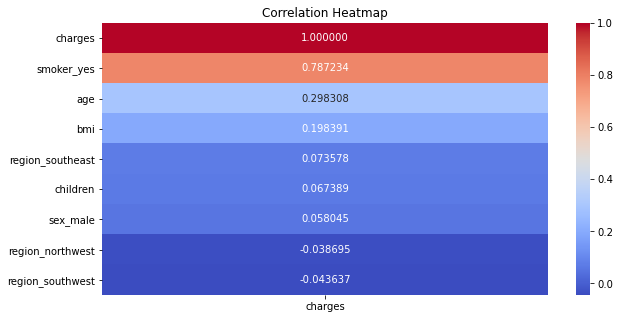

In [14]:
correlation_matrix = df_encoded.corr()['charges'].sort_values(ascending=False).to_frame()

import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix,annot=True, cmap = 'coolwarm', fmt='2f')
plt.title('Correlation Heatmap')
plt.show()

## Modelling and Evaluation

In [15]:
# features and target
X = df_encoded.drop(columns=['charges'], axis = 1)
y = df_encoded['charges']



In [16]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 1. Muliple Linear Regression

In [17]:
# linear regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# predict
y_pred_lr = lr_model.predict(X_test)

In [19]:
# Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R squared: {r2:.2f}')
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error: 4177.02
Mean Squared Error: 35478636.52
R squared: 0.81
Root Mean Squared Error (RMSE): 5956.39


Interpretation:
- MAE ($4177.02): On average, predictions deviate by $4.2K from the actual charges
- RMSE ($5956.39) : Some predictions deviate even more, meaning outliers or high charges are harder to predict accurately
- R-squared scoree = 0.81 : The model explains 81% of the variance in medical charges.